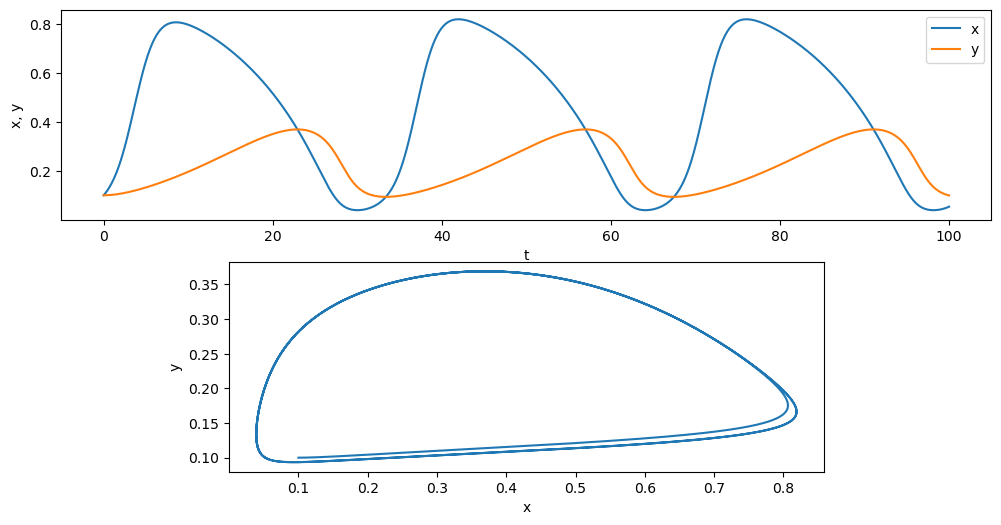

In [5]:
import matplotlib.pyplot as plt
from Helpers.solvers import solve_to
import numpy as np

# Define ODE
def ode(t, y, a=1, d=0.1, b=0.1):
    x = y[0]
    y = y[1]
    dxdt = x*(1-x) - (a*x*y)/(d+x)
    dydt = b*y*(1 - y/x)
    return np.array([dxdt, dydt])

t, y = solve_to(ode, 0, [0.1, 0.1], t_max=100, n_max=None, method='RK4', deltat_max=0.01)
# Plot the results. x,y vs t. x vs y
fig, ax = plt.subplots(2, 1, figsize=(12, 6))
ax[0].plot(t, y[:,0], label='x')
ax[0].plot(t, y[:,1], label='y')
ax[0].legend()
ax[0].set_xlabel('t')
ax[0].set_ylabel('x, y')

ax[1].plot(y[:,0], y[:,1])
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_aspect('equal', 'box')

plt.show()

In [6]:
def plot_values(x0, y0, T):
    t, y = solve_to(ode, 0, [x0, y0], t_max=T, n_max=None, method='RK4', deltat_max=0.01)
    # Plot the results. x,y vs t. x vs y
    fig, ax = plt.subplots(2, 1, figsize=(12, 6))
    ax[0].plot(t, y[:,0], label='x')
    ax[0].plot(t, y[:,1], label='y')
    ax[0].legend()
    ax[0].set_xlabel('t')
    ax[0].set_ylabel('x, y')

    ax[1].plot(y[:,0], y[:,1])
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('y')
    ax[1].set_aspect('equal', 'box')

    plt.show()

(3.0864122646523384e-07, 3.4539686487339294e-05, -3.4084180283722176e-08)
x0 = 0.8189692025613291, y0 = 0.16632699836247766, T = 34.06000744012929


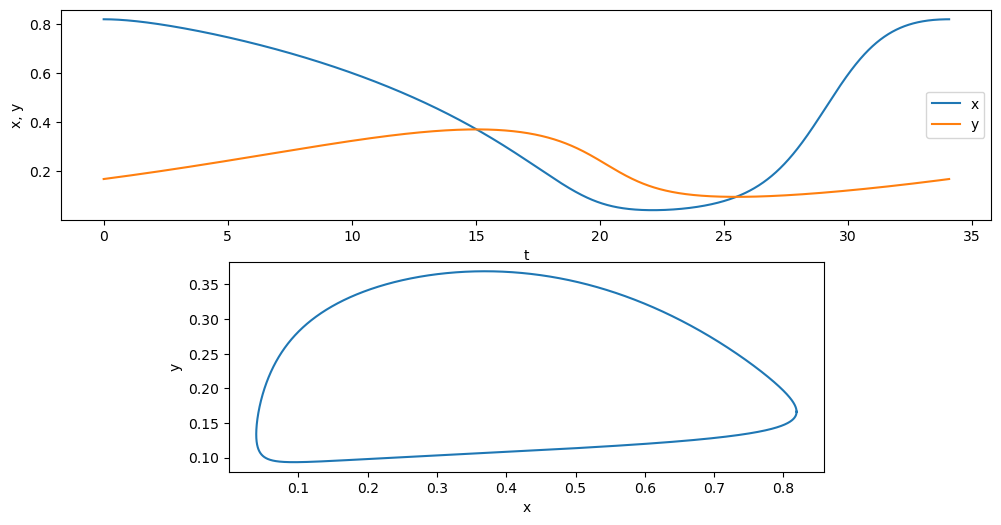

In [7]:
from Helpers.solvers import solve_to
import numpy as np
from scipy.optimize import root, fsolve

# Define ODE
def ode(t, y, a=1, d=0.1, b=0.1):
    x = y[0]
    y = y[1]
    dxdt = x*(1-x) - (a*x*y)/(d+x)
    dydt = b*y*(1 - y/x)
    return np.array([dxdt, dydt])


# Define the phase function and the condition
def phase_function(t, y):
    dx, dy = ode(t, y)
    return dx


# Set up the shooting method
def func(U0):
    x0, y0, T = U0

    t, y = solve_to(ode, 0, np.array([x0, y0]), t_max=T, deltat_max=0.01)

    phase_valueStart = phase_function(0, np.array([x0, y0]))
    phase_valueEnd = phase_function(T, y[-1,:])

    condition1 = (y[-1,0] - x0)      # x(T) - x(0) = 0
    condition2 = (y[-1,1] - y0)      # y(T) - y(0) = 0
    condition3 = phase_valueEnd      # dx/dt(T) = 0

    return condition1, condition2, condition3

# Initial guess
guess = np.array([0.6, 0.8, 35])
sol = root(func, guess)
print(func(sol.x))
x0, y0, T = sol.x
print('x0 = {}, y0 = {}, T = {}'.format(x0, y0, T))
plot_values(x0, y0, T)

C:\Users\duppu\AppData\Local\Temp\ipykernel_25216\1760722575.py:9: RuntimeWarning: overflow encountered in double_scalars
  dxdt = x*(1-x) - (a*x*y)/(d+x)
C:\Users\duppu\AppData\Local\Temp\ipykernel_25216\1760722575.py:9: RuntimeWarning: invalid value encountered in double_scalars
  dxdt = x*(1-x) - (a*x*y)/(d+x)
c:\Users\duppu\miniconda3\envs\ScientificComputing\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


The solution satisfies the boundary conditions.
[0.8189692  0.16636172] 34.06960743834717


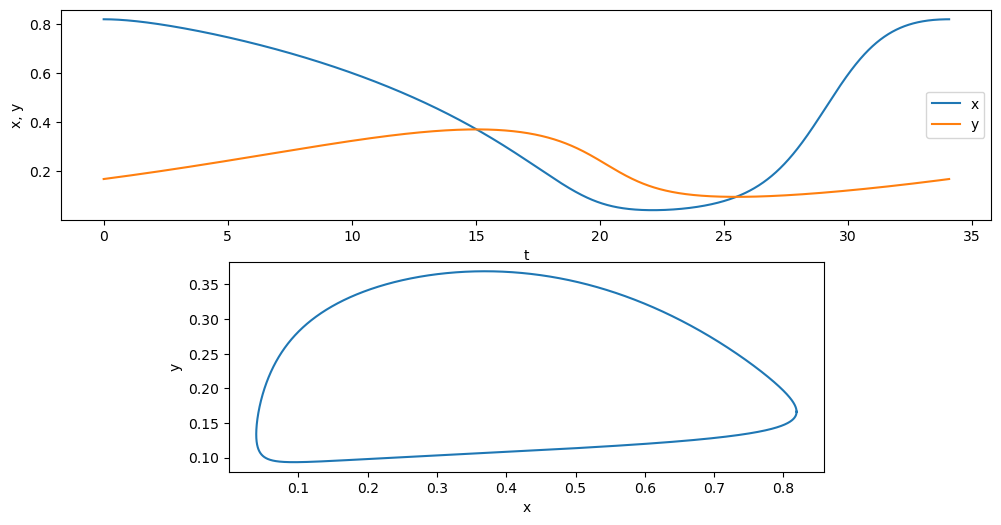

In [8]:
import matplotlib.pyplot as plt

def shooting(initial_guess, ode, phase_function, atol=1e-4):
    '''
    Shooting method for solving boundary value problems. 
    
    parameters
    ----------
    initial_guess: array
        The initial guess should be a list of the form [y0, y1, ..., yn, T], where y0, y1, ..., yn
        are the initial conditions for the ODE and T is the time period for the ODE.
    ode: function
        The ODE to be solved. The function should take the form f(t, y, *args), where t is the
        independent variable, y is the dependent variable, and *args are the parameters of the ODE.
    phase_function: function
        The phase function for the ODE. The function should take the same inputs as the ODE. The phase
        function is used to determine the differential at the start of the ODE and should be zero at
        the end of the ODE.
    atol: float, optional
        The absolute tolerance for the ODE solver. The default value is 1e-4.

    returns
    -------
    X0: array
        The array of initial conditions for the ODE that satisfy the boundary conditions.
    T: float
        The time period for the ODE.

    example
    -------
    >>> def ode(t, y, a=1, d=0.1, b=0.1):
    ...     x = y[0]
    ...     y = y[1]
    ...     dxdt = x*(1-x) - (a*x*y)/(d+x)
    ...     dydt = b*y*(1 - y/x)
    ...     return np.array([dxdt, dydt])
    >>> def phase_function(t, y):
    ...     dx, dy = ode(t, y)
    ...     return dx
    >>> initial_guess = [0.6, 0.8, 35]
    >>> X0, T = shooting(initial_guess, ode, phase_function)
    '''
    # Check that the initial guess is of the correct form for the ODE
    try:
        solve_to(ode, 0, initial_guess[:-1], n_max=1)
    except:
        raise ValueError('The initial guess is not of the correct form. The initial guess should be a list of the form [y0, y1, ..., yn, T], where y0, y1, ..., yn are the initial conditions for the ODE and T is the time period.')

    try:
        phase_function(0, initial_guess[:-1])
    except:
        raise ValueError('The phase function is not of the correct form. The phase function should take the same inputs as the ODE.')


    # Set up function to optimize
    def shooting_root(initial_guess):
        T = initial_guess[-1]
        Y0 = np.array(initial_guess[:-1])

        # Solve the ODE
        t, y = solve_to(ode, 0, Y0, t_max=T)

        # Set up the conditions array
        num_vars = len(initial_guess)
        conditions = np.zeros(num_vars)
        # Dynamically fill in the conditions array
        for i in range(num_vars - 1):
            conditions[i] = y[-1,i] - Y0[i]        # X(T) - X(0) = 0

        # Final condition is the phase function
        phase_value = phase_function(0, Y0)
        conditions[-1] = phase_value               # dx/dt(T) = 0

        return conditions

    sol = fsolve(shooting_root, initial_guess)
    X0 = np.array(sol[:-1])
    T = sol[-1]

    # Check that the solution is valid
    final_conditions = shooting_root(sol)
    if np.allclose(final_conditions, np.zeros(len(sol)), atol=atol):
        print('The solution satisfies the boundary conditions.')
    else:
        message = '''The solution does not satisfy the boundary conditions. 
        The final conditions are: {}'.format(final_conditions). Try changing 
        the initial guess or increasing the absolute tolerance.
        '''
        raise ValueError(message)

    return X0, T

# Initial guess
guess = np.array([0.6, 0.8, 35])
X0, T = shooting(guess, ode, phase_function)
t, y = solve_to(ode, 0, X0, t_max=T, n_max=None, method='RK4', deltat_max=0.01)
print(X0, T)
plot_values(x0, y0, T)

In [10]:
def shooting_root(initial_guess):
        T = initial_guess[-1]
        Y0 = np.array(initial_guess[:-1])

        # Solve the ODE
        t, y = solve_to(ode, 0, Y0, t_max=T)

        # Set up the conditions array
        num_vars = len(initial_guess)
        conditions = np.zeros(num_vars)
        # Dynamically fill in the conditions array
        for i in range(num_vars - 1):
            conditions[i] = y[-1,i] - Y0[i]        # X(T) - X(0) = 0

        # Final condition is the phase function
        phase_value = phase_function(0, Y0)
        conditions[-1] = phase_value               # dx/dt(T) = 0

        return conditions

t, y = solve_to(ode, 0, X0, t_max=T, n_max=None, method='RK4', deltat_max=0.01)
print(X0, T)
print(y[-1], t[-1])
np.isclose(X0, y[-1], atol=1e-3)

[0.8189692  0.16636172] 34.06960743834717
[0.81896947 0.16639626] 34.07000000000179


array([ True,  True])

In [59]:
def shooting_root(initial_guess):
    T = initial_guess[-1]
    Y0 = np.array(initial_guess[:-1])

    # Solve the ODE
    t, y = solve_to(ode, 0, Y0, t_max=T)

    # Set up the conditions array
    num_vars = len(initial_guess)
    conditions = np.zeros(num_vars)
    # Dynamically fill in the conditions array
    for i in range(num_vars - 1):
        conditions[i] = y[-1,i] - Y0[i]        # X(T) - X(0) = 0

    # Final condition is the phase function
    phase_value = phase_function(0, Y0)
    conditions[-1] = phase_value               # dx/dt(T) = 0

    return conditions


False

In [ ]:

def fun(X0):
    x0, y0, T = X0

    ode.t_max = T
    t, y = ode.solve_to(np.array([x0, y0]))
    
    x_end = y[-1, 0]
    y_end = y[-1, 1]
    
    deltas = phase_function(x_end, y_end)

    condition1 = x_end - x0
    condition2 = y_end - y0
    condition3 = deltas

    print('Conditions: ', condition1, condition2, condition3)

    return np.array([condition1, condition2, condition3])

from scipy.optimize import fsolve, root

sol = root(fun, [0.4, 0.3, 20])
print(sol)